In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
PlottingFormat_Folder = '/Users/seetha/Box Sync/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

In [3]:
from define_attentivelaps import LoadData, Bayes_Attention, CommonFunctions

In [4]:
DirectoryName = '/Users/seetha/Box Sync/NoReward/ImagingData/Good_behavior_suite2p/'
BayesFolder = '/Users/seetha/Box Sync/NoReward/ImagingData/Good_behavior_suite2p/BayesResults_All/'
SaveFigureFolder = '/Users/seetha/Box Sync/NoReward/NewPaperFigures/Figure2/Attention/'

['CFC4', 'NR14', 'NR15', 'NR23', 'NR24', 'NR34', 'CFC19', 'CFC17', 'NR32', 'CFC16', 'NR6', 'NR21']


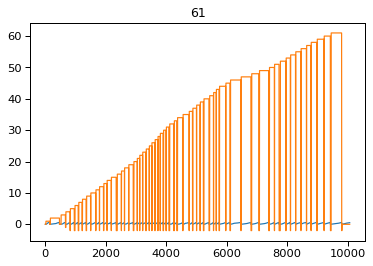

6.74441648899913
CFC4 Task1 39 (39,) (39,) (38,)
CFC4 Task2 61 (61,) (61,) (60,)
CFC4 Task3 37 (37,) (37,) (36,)
CFC4 Task4 41 (41,) (41,) (40,)


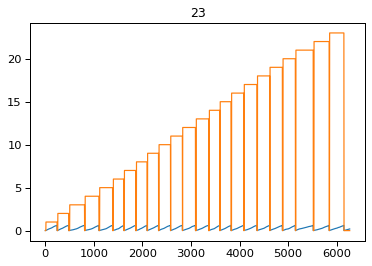

11.199985058321385
NR14 Task1 30 (30,) (30,) (29,)
NR14 Task2 23 (23,) (23,) (22,)
NR14 Task3 20 (20,) (20,) (19,)
NR14 Task4 20 (20,) (20,) (19,)


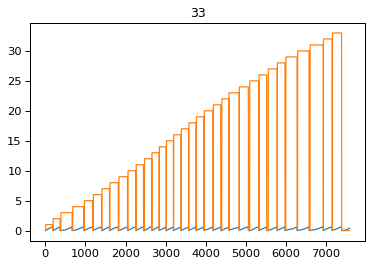

9.27743586629421
NR15 Task1 34 (34,) (34,) (33,)
NR15 Task2 33 (33,) (33,) (32,)


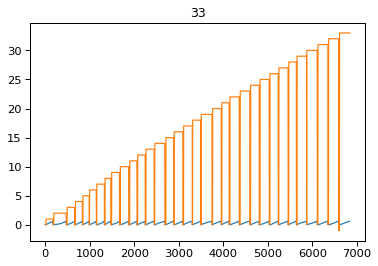

7.94085769451943
NR23 Task1 40 (40,) (40,) (39,)
NR23 Task2 33 (33,) (33,) (32,)
NR23 Task3 37 (37,) (37,) (36,)
NR23 Task4 49 (49,) (49,) (48,)


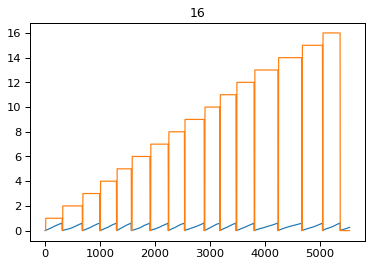

12.878501180001408
NR24 Task1 27 (27,) (27,) (26,)
NR24 Task2 16 (16,) (16,) (15,)
NR24 Task3 22 (22,) (22,) (21,)
NR24 Task4 25 (25,) (25,) (24,)


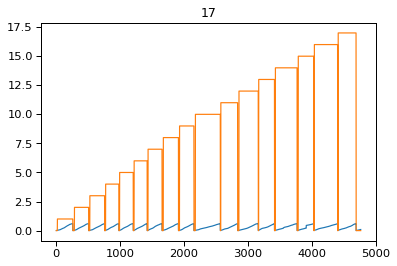

14.86822416300322
NR34 Task1 30 (30,) (30,) (29,)
NR34 Task2 17 (17,) (17,) (16,)


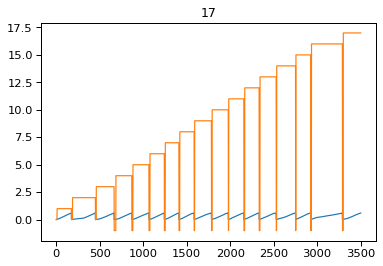

9.01374320526816
CFC19 Task1 36 (36,) (36,) (35,)
CFC19 Task2 17 (17,) (17,) (16,)


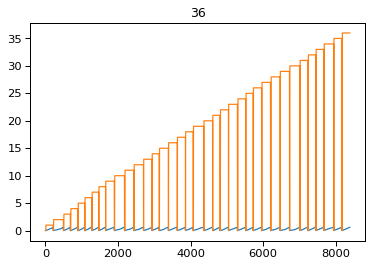

9.974973072266533
CFC17 Task1 36 (36,) (36,) (35,)
CFC17 Task2 36 (36,) (36,) (35,)


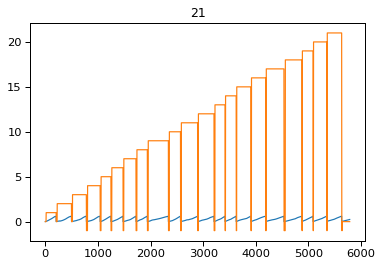

14.401033841131103
NR32 Task1 28 (28,) (28,) (27,)
NR32 Task2 21 (21,) (21,) (20,)


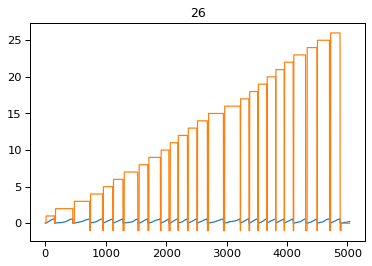

12.839310526853298
CFC16 Task1 31 (31,) (31,) (30,)
CFC16 Task2 26 (26,) (26,) (25,)


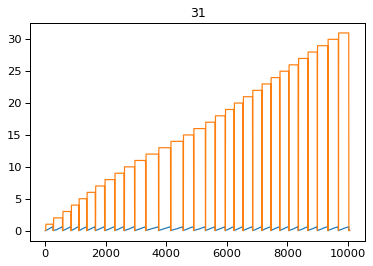

12.578414124914074
NR6 Task1 43 (43,) (43,) (42,)
NR6 Task2 31 (31,) (31,) (30,)
NR6 Task3 25 (25,) (25,) (24,)
NR6 Task4 33 (33,) (33,) (32,)


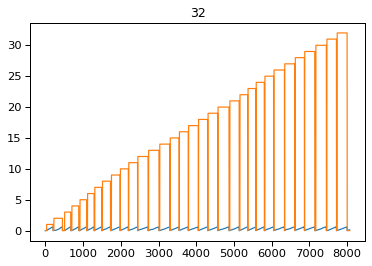

10.505090662810744
NR21 Task1 40 (40,) (40,) (39,)
NR21 Task2 32 (32,) (32,) (31,)
NR21 Task3 22 (22,) (22,) (21,)
NR21 Task4 20 (20,) (20,) (19,)


In [5]:
at = Bayes_Attention(DirectoryName, BayesFolder)

## Plot speed heatmap

In [ ]:
fs, ax = plt.subplots(len(at.animalname), 3, figsize=(7, 20), sharex='all')
for n, a in enumerate(at.animalname):
    at.plot_velocity_inspace(fs, ax[n, :], a, taskstoplot=['Task1', 'Task2', 'Task3'])
fs.tight_layout()

## Plot cumulative speed ratio

In [6]:
#Get slope from dark behavior
Darkdatafolder = '/Users/seetha/Box Sync/NoReward/Dark/SaveAnalysed'
darkvel = np.load(os.path.join(Darkdatafolder, 'velocity_in_space.npz'), allow_pickle=True)

In [7]:
speed_ratio_dark = []
for a in darkvel['animalname']:
    speed_ratio_dark.extend(darkvel['speed_ratio'].item()[a])

In [8]:
#Get slope from experimental tasks
taskstoplot =['Task1', 'Task2']
speed_ratio_exp = {k:[] for k in taskstoplot}
for a in at.animalname:
    for t in taskstoplot:
        speed_ratio_exp[t].extend(at.speed_ratio[a][t])

In [13]:
print(np.shape(speed_ratio_exp['Task1']))
print(np.shape(speed_ratio_exp['Task2']))

(410,)
(331,)


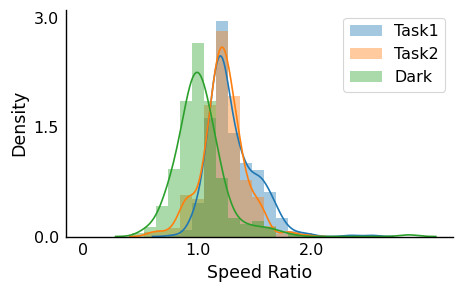

In [18]:
fs, ax = plt.subplots(1, dpi=100)
sns.distplot(speed_ratio_exp['Task1'], bins=np.linspace(0, 2, 20),
             kde=True, ax=ax, label='Task1')
sns.distplot(speed_ratio_exp['Task2'], bins=np.linspace(0, 2, 20),
             kde=True, ax=ax, label='Task2')
sns.distplot(speed_ratio_dark, bins=np.linspace(0, 2, 20), kde=True, ax=ax, label='Dark')
ax.legend()
ax.set_xticks((0, 1.00, 2.00))
ax.set_xticklabels((0, 1.00, 2.00))
pf.set_axes_style(ax, numticks=3)
ax.set_xlabel('Speed Ratio');
fs.set_size_inches((5, 3))

In [9]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.nanmean(a), scipy.stats.sem(a, nan_policy='omit')
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    print('Mean %0.3f +/- %0.3f CI %0.3f %0.3f' %(m, h, m-h, m+h))
    return m, h

mean_confidence_interval(speed_ratio_dark)
mean_confidence_interval(speed_ratio_exp['Task1'])
mean_confidence_interval(speed_ratio_exp['Task2'])

Mean 1.023 +/- 0.031 CI 0.992 1.054
Mean 1.301 +/- 0.020 CI 1.281 1.322
Mean 1.218 +/- 0.020 CI 1.197 1.238


(1.2176970435767622, 0.02049457368206894)

In [19]:
t, p_value1 = scipy.stats.ks_2samp(speed_ratio_dark, speed_ratio_exp['Task1'])
t, p_value2 = scipy.stats.ks_2samp(speed_ratio_dark, speed_ratio_exp['Task2'])
t, p_value3 = scipy.stats.ks_2samp(speed_ratio_exp['Task1'], speed_ratio_exp['Task2'])
print('P-values: \n Dark with Task1 %0.3f \n Dark with Task2 %0.3f \n Task1 with Task2 %0.3f'%(p_value1, p_value2, p_value3))

P-values: 
 Dark with Task1 0.000 
 Dark with Task2 0.000 
 Task1 with Task2 0.001


### Amount of attention paid in each animal

In [ ]:
fs, ax = plt.subplots(1)
dict_sp = {k:[] for k in taskstoplot}

for t in taskstoplot:
    for a in at.animalname:
        dict_sp[t].append(np.mean(at.speed_ratio[a][t]))
    ks, p = scipy.stats.shapiro(dict_sp[t])
    print('Normality test for %s p-value %0.3f' % (t, p))
    
#P-value
t, p = scipy.stats.mannwhitneyu(dict_sp['Task1'], dict_sp['Task2'])
print('P-value between Task1 and Task2 %0.3f' %p)
df_sp = pd.DataFrame.from_dict(dict_sp)

for index, row in df_sp.iterrows():
    ax.plot([0, 1], row, 'ko-',  markerfacecolor='none')
df_sp = pd.melt(df_sp, value_name='Attention', var_name='Task')

#Dark boxplot
dark_mean = []
for a in darkvel['animalname']:
    dark_mean = np.mean(darkvel['speed_ratio'].item()[a])
    ax.plot(2, dark_mean, 'ko', markerfacecolor='none')
    df_sp = df_sp.append({'Task':'Dark', 'Attention':dark_mean}, ignore_index=True)
sns.boxplot(x='Task', y='Attention', data=df_sp, ax=ax)
pf.set_axes_style(ax, numticks=3)

t, p = scipy.stats.mannwhitneyu(dict_sp['Task1'], df_sp[df_sp.Task=='Dark']['Attention'])
print('P-value between Task1 and Dark %0.3f' %p)
t, p = scipy.stats.mannwhitneyu(dict_sp['Task2'], df_sp[df_sp.Task=='Dark']['Attention'])
print('P-value between Task2 and Dark %0.3f' %p)


## Plot ratio per animal

In [ ]:
#Get slope from experimental tasks
taskstoplot =['Task1', 'Task2']
fs, ax = plt.subplots(4, 3, figsize=(10, 7))
ax = ax.flatten()
for n, a in enumerate(at.animalname):
    for t in taskstoplot:
        sns.distplot(at.speed_ratio[a][t], bins=10, ax=ax[n], label=t)
    sns.distplot(speed_ratio_dark, bins=10, ax=ax[n], label='Dark')
    ax[n].set_title(a)
    ax[n].set_xlim((0, 2))
    pf.set_axes_style(ax[n])

fs.tight_layout()

## Run with bayes error

In [9]:
df, df_p, attentive, notattentive, licklaps = at.calculate_attentive_non_attentive_laps(taskstoget=['Task1', 'Task2'], tol=0)

CFC4 Task2 : Threshold 1.2, Total laps 61, Licklaps 11, NoLicklaps 49, Goodlaps 32, Worstlaps 17
NR14 Task2 : Threshold 1.1, Total laps 23, Licklaps 8, NoLicklaps 14, Goodlaps 13, Worstlaps 1
NR15 Task2 : Threshold 1.1, Total laps 26, Licklaps 9, NoLicklaps 23, Goodlaps 8, Worstlaps 9
NR23 Task2 : Threshold 1.0, Total laps 33, Licklaps 5, NoLicklaps 27, Goodlaps 23, Worstlaps 4
NR24 Task2 : Threshold 1.0, Total laps 16, Licklaps 3, NoLicklaps 12, Goodlaps 8, Worstlaps 4
NR34 Task2 : Threshold 0.9, Total laps 17, Licklaps 8, NoLicklaps 8, Goodlaps 6, Worstlaps 1
CFC19 Task2 : Threshold 1.0, Total laps 17, Licklaps 6, NoLicklaps 10, Goodlaps 9, Worstlaps 1
CFC17 Task2 : Threshold 1.1, Total laps 36, Licklaps 5, NoLicklaps 30, Goodlaps 28, Worstlaps 2
NR32 Task2 : Threshold 1.2, Total laps 21, Licklaps 4, NoLicklaps 16, Goodlaps 2, Worstlaps 14
CFC16 Task2 : Threshold 1.2, Total laps 26, Licklaps 3, NoLicklaps 22, Goodlaps 15, Worstlaps 7
NR6 Task2 : Threshold 1.0, Total laps 23, Licklaps

No handles with labels found to put in legend.


(12, 3)
Removing ouliers ['CFC4', 'NR32', 'CFC4', 'NR32']
4
Multiple comparisons after removing Outliers
Normality test for Task1_goodlap p-value 0.277
Normality test for Task2_goodlap_withlicks p-value 0.650
Normality test for Task2_goodlap p-value 0.519
Performing Parametric test 

      Task1_goodlap Task2_goodlap_withlicks Task2_goodlap
NR14       0.959354                0.823044      0.769981
NR15       0.933079                 0.85906       0.87665
NR23       0.897389                0.792106      0.727514
NR24       0.845875                0.841536      0.780602
NR34       0.936032                0.872682      0.710497
CFC19      0.903206                0.933868      0.888655
CFC17      0.966518                0.743535      0.705712
CFC16      0.921229                0.899046      0.818966
NR6        0.973484                0.942321      0.867876
NR21       0.970707                0.946244      0.656648
Test Multiple Comparison ttest_rel 
FWER=0.01 method=Bonf
alphacSidak=0.00, a

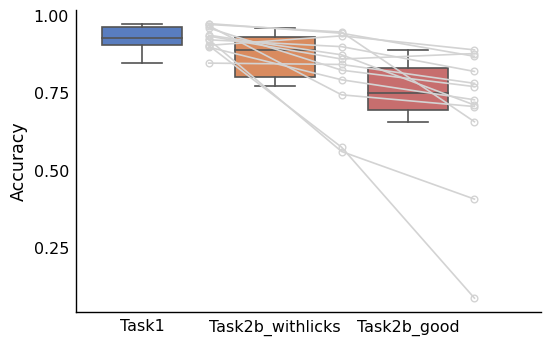

In [7]:
fs, ax = plt.subplots(1, dpi=100)
at.plot_boxplot_of_attention(ax, df, df_p)

Number of attentive laps 138, not attentive laps 108


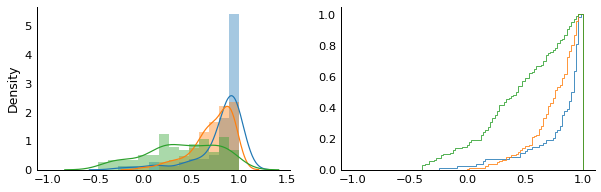

In [44]:
fs, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.distplot(licklaps, bins = np.linspace(-1, 1, 20), ax=ax[0])
sns.distplot(attentive, bins = np.linspace(-1, 1, 20), ax=ax[0])
sns.distplot(notattentive, bins = np.linspace(-1, 1, 20), ax=ax[0])
ax[1].hist(licklaps, bins = np.linspace(-1, 1, 100), cumulative=True, histtype='step', density=True)
ax[1].hist(attentive, bins = np.linspace(-1, 1, 100), cumulative=True, histtype='step', density=True)
ax[1].hist(notattentive, bins = np.linspace(-1, 1, 100), cumulative=True, histtype='step', density=True)
for a in ax:
    pf.set_axes_style(a)
print('Number of attentive laps %d, not attentive laps %d' %(np.size(attentive), np.size(notattentive)))

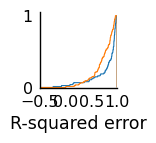

In [55]:
fs, ax = plt.subplots(1, dpi=100)
ax.hist(licklaps, bins = np.linspace(-0.5, 1, 1000), cumulative=True, histtype='step', density=True, label='With Lick')
ax.hist(attentive, bins = np.linspace(-0.5, 1, 1000), cumulative=True, histtype='step', density=True, label='Attention_withoutlick')
ax.set_xticks((-0.5, 0, 0.5, 1))
ax.set_xlim((-0.5, 1))
ax.set_xlabel('R-squared error')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pf.set_axes_style(ax)
fs.set_size_inches((1, 1))
fs.savefig(os.path.join(SaveFigureFolder, 'Cumulative_withattention.pdf'), bbox_inches='tight', transparent=True)

In [ ]:
t, p_value1 = scipy.stats.ks_2samp(licklaps, attentive)
t, p_value2 = scipy.stats.ks_2samp(licklaps, notattentive)
t, p_value3 = scipy.stats.ks_2samp(attentive, notattentive)
print('P-values: \n lick with attentive %0.3f \n lick with not attentive %0.3f \n attentive with not attentive %0.3f'%(p_value1, p_value2, p_value3))

## Get attention error with lick stop

In [7]:
df, df_p, attentive, notattentive, licklaps = at.calculate_attentive_non_attentive_laps_withlickstop(taskstoget=['Task1', 'Task2'], tol=0)

CFC4 Task2 : Threshold 1.2, Total laps 61, Licklaps 9, NoLicklaps 51, Goodlaps 31, Worstlaps 20
NR14 Task2 : Threshold 1.1, Total laps 23, Licklaps 11, NoLicklaps 11, Goodlaps 10, Worstlaps 1
NR15 Task2 : Threshold 1.1, Total laps 26, Licklaps 10, NoLicklaps 22, Goodlaps 6, Worstlaps 10
NR23 Task2 : Threshold 1.0, Total laps 33, Licklaps 3, NoLicklaps 29, Goodlaps 26, Worstlaps 3
NR24 Task2 : Threshold 1.0, Total laps 16, Licklaps 5, NoLicklaps 10, Goodlaps 6, Worstlaps 4
NR34 Task2 : Threshold 0.9, Total laps 17, Licklaps 12, NoLicklaps 4, Goodlaps 2, Worstlaps 1
CFC19 Task2 : Threshold 1.0, Total laps 17, Licklaps 8, NoLicklaps 8, Goodlaps 7, Worstlaps 1
CFC17 Task2 : Threshold 1.1, Total laps 36, Licklaps 7, NoLicklaps 28, Goodlaps 26, Worstlaps 2
NR32 Task2 : Threshold 1.2, Total laps 21, Licklaps 4, NoLicklaps 16, Goodlaps 2, Worstlaps 14
CFC16 Task2 : Threshold 1.2, Total laps 26, Licklaps 3, NoLicklaps 22, Goodlaps 15, Worstlaps 7
NR6 Task2 : Threshold 1.0, Total laps 23, Lickla

No handles with labels found to put in legend.


Median: Task1_goodlap 0.928
Task1_goodlap Mean 0.93 +- CI 0.90 0.95
Median: Task2_goodlap_withlicks 0.891
Task2_goodlap_withlicks Mean 0.88 +- CI 0.84 0.92
Median: Task2_goodlap 0.722
Task2_goodlap Mean 0.65 +- CI 0.49 0.81
Median: Task2_worstlap 0.325
Task2_worstlap Mean 0.31 +- CI 0.06 0.56
(12, 4)
Removing ouliers ['NR32']
1
Multiple comparisons after removing Outliers
Normality test for Task1_goodlap p-value 0.303
Normality test for Task2_goodlap_withlicks p-value 0.246
Normality test for Task2_goodlap p-value 0.050
Performing Non Parametric test 

      Task1_goodlap Task2_goodlap_withlicks Task2_goodlap Task2_worstlap
CFC4        0.92213                0.926848      0.319312       0.195298
NR14       0.959354                0.857733      0.763711      -0.109454
NR15       0.933079                0.932752       0.87665      -0.130339
NR23       0.897389                0.743116      0.736581       0.680123
NR24       0.845875                0.869038      0.707007      0.0134815
NR3

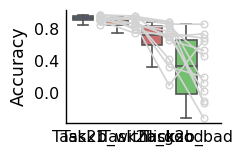

In [9]:
fs, ax = plt.subplots(1, dpi=100)
at.plot_boxplot_of_attention(ax, df, df_p, rows_to_plot=4)
fs.set_size_inches((2, 1.5))
# fs.savefig(os.path.join(SaveFigureFolder, 'Bayes_boxplot_attention_withgoodlaps.pdf'), bbox_inches='tight', transparent=True)

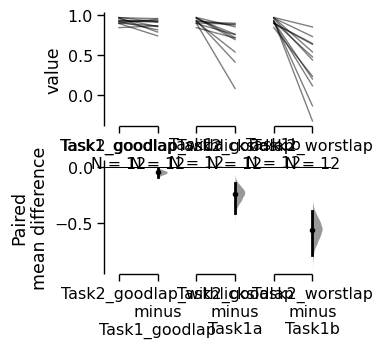

In [81]:
fs, ax = plt.subplots(1, dpi=100)
at.plot_estimation_plot(ax, df_p)
fs.tight_layout()
fs.set_size_inches((3, 1.5))
# fs.savefig(os.path.join(SaveFigureFolder, 'Bayes_boxplot_attention_dabest.pdf'), bbox_inches='tight', transparent=True)

## Bayes error with slowing down

In [ ]:
animallist = ['NR15', 'CFC19'] #Animals with no attentive laps   

In [ ]:
fs, ax = plt.subplots(1)
at.plot_scatter(ax, animallist)

## Plot scatter by attention

(86,) (86,)
coefficient of determination: 0.060
(212,) (212,)
coefficient of determination: 0.000
(105,) (105,)
coefficient of determination: 0.124


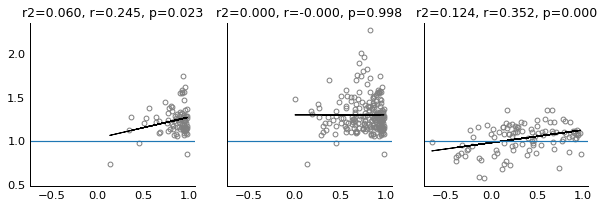

In [8]:
fs, ax = plt.subplots(1, 3, figsize=(10, 3), sharex='all', sharey='all')
at.plot_scatter_by_attention(ax)

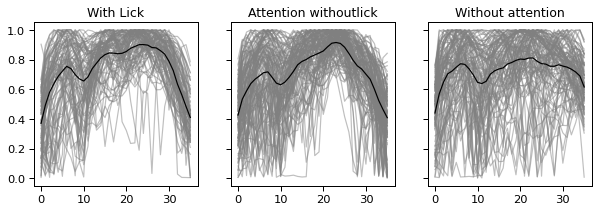

In [9]:
fs, ax = plt.subplots(1, 3, figsize=(10, 3), sharex='all', sharey='all')
at.plot_velocity_inspace_byattention(ax)

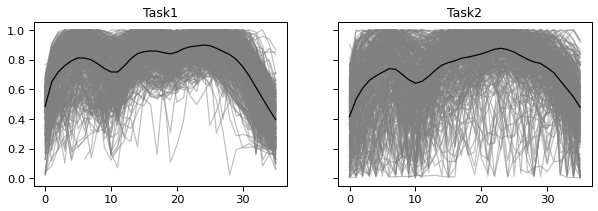

In [10]:
#Task1 and Task2
fs, ax = plt.subplots(1, 2, figsize=(10, 3), sharex='all', sharey='all')
at.plot_velocity_inspace_bytask(ax[0], 'Task1')
at.plot_velocity_inspace_bytask(ax[1], 'Task2')

## Task1

In [ ]:
b = []
s = []
for a in at.animalname:
        b.extend(at.bayescompiled[a]['Task1'][-10:])
        s.extend(at.speed_ratio[a]['Task1'][-10:])

In [ ]:
plt.plot(b, s, 'o', color='grey', markerfacecolor='none')
pearsonsr = scipy.stats.pearsonr(np.nan_to_num(b), np.nan_to_num(s))
y_pred_linearreg, rsquared = CommonFunctions.linear_regression(np.asarray(b),
                                                                       np.asarray(s))
plt.title('r2=%0.3f, r=%0.3f, p=%0.3f' % (rsquared, pearsonsr[0], pearsonsr[1]))
plt.plot(b, y_pred_linearreg, color='k', linewidth=1)